#Jose Luis Soto Soto (2181583)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


#Punto 1
Definamos $f(X)$ como la funcion de costo, teniendo como base la distancia recorrida. $C$ como el vector de costo para cada viaje por proveedor, siendo que los viajes por proveedor son el vector $X$. Los elementos de la matriz $A \in\mathbb{R}^{n \times m}$ con $n$ tipos de cajas para cada proveedor y $m$ proveedores. Sea $b$ el vector de $n$ filas, siendo que cada fila corresponde al numero de cajas necesitada por su respectivo tipo.

<center>
$ 
C = \begin{bmatrix}
150 \\ 300
\end{bmatrix}; 
X = \begin{bmatrix}
x_1 \\ x_2
\end{bmatrix};
f(X)= C^TX
$

$
A = \begin{bmatrix}
8 & 2 \\ 1& 1 \\ 2 & 7
\end{bmatrix};
b=\begin{bmatrix}
16 \\ 5 \\ 20
\end{bmatrix}
$


Entonces se puede definir el problema de optimizacion de la siguiente forma:

$
\begin{matrix}
\underset{x}{\text{min}} & f(X)= C^TX\\ \text{Subject to } & (AX - B)_i \geq 0
\end{matrix} 
$
</center>
 

In [ ]:
xr1 = np.arange(0, 2.8, 0.1)
xr2 = np.arange(-2.5, 7.8, 0.1)
xr3 = np.arange(-2.4, 7.9, 0.1)
def g1(x):
  return 8 - 4*x

def g2(x):
  return 5-x

def g3(x):
  return (20-2*x)/7

y1r = g1(xr1)
y2r = g2(xr2)
y3r = g3(xr3)

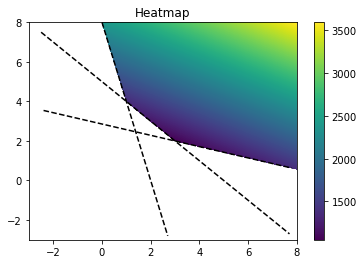

In [ ]:

x=np.linspace(-3,8,1000)
y=np.linspace(-3,8,1000)

x,y=np.meshgrid(x,y)

def f(x1,x2):
  return 150*x1 + 300*x2

z=f(x,y)
z = np.ma.masked_where((y<8-4*x)|(y<5-x)|(y<(20-2*x)/7), z)
figure, axes = plt.subplots()

H=axes.pcolormesh(x,y,z)
axes.set_title('Heatmap')
figure.colorbar(H)
axes.plot(xr1,y1r,'k--')
axes.plot(xr2,y2r,'k--')
axes.plot(xr3,y3r,'k--')


#Punto 2
Definase a $X$ como el vector que contiene el numero de veces que aparece cada programa, a $C$ como el vector que corresponde a los respectivos espectadores de cada programa. Siendo que la matriz $A$ contiene el tiempo en vivo tanto de publicidad como de variedad de cada programa, y que el vector $b$ posee la cantidad de tiempo requerida para llenar los respectivos intervalos para publicidad y variedad. Se puede formular el siguiente problema de optimizacion:


<center>
$ 
C = \begin{bmatrix}
30000 \\ 10000
\end{bmatrix}; 
X = \begin{bmatrix}
x_1 \\ x_2
\end{bmatrix};
f(X)= -C^TX
$

$
A = \begin{bmatrix}
20 & 10 \\ 1 & 1 
\end{bmatrix};
b=\begin{bmatrix}
80 \\ 6 
\end{bmatrix}
$


Entonces se puede definir el problema de optimizacion de la siguiente forma:

$
\begin{matrix}
\underset{x}{\text{min}} & f(X)= -C^TX\\ \text{Subject to } & (AX - B)_i \leq 0
\\ & x_i \geq 0
\end{matrix} 
$
</center>

In [ ]:
x1=np.linspace(0,4,100)
x2=np.linspace(0,4,100)
def c1(x):
  return 8-2*x

def c2(x):
  return 6-x

y1=c1(x1)
y2=c2(x2)

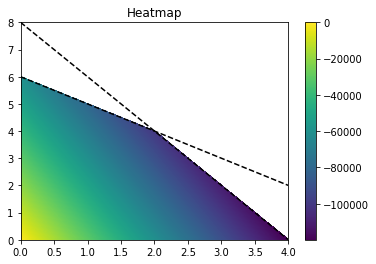

In [ ]:
x=np.linspace(0,4,1000)
y=np.linspace(0,8,1000)

x,y=np.meshgrid(x,y)

def f(x1,x2):
  return -(30000*x1 + 10000*x2)

z=f(x,y)
z = np.ma.masked_where(((y>8-2*x)|(y>6-x)|(y<0)|(x<0)),z)
figure, axes = plt.subplots()

H=axes.pcolormesh(x,y,z)
axes.set_title('Heatmap')
figure.colorbar(H)
axes.plot(x1,y1,'k--')
axes.plot(x2,y2,'k--')


#Punto 3
Sean 

$P$ con $p_1,...,p_n \geq 0$ el vector correspondiente a la potencia de cada uno de los $n$ transmisores.

$G \in \mathbb{R}^{n \times n}$ la matriz de ganancias de la ruta de los transmisores a los receptores, donde $g_{ij} \geq 0$ es la ganancia de la ruta del transmisor $j$ al receptor $i$.

Entonces $s_i=g_{ii}p_i$ es la potencia del transmisor $i$ al receptor $i$, a la cual le corresponde una interferencia de $I_i= \sum_{k \neq i}g_{ik}p_k$.

Siendo que  $P_i^{max}$ es la potencia maxima permitida para cada transmisor,que los transmisores se dividen en subconjuntos que comparten una misma fuente de alimentacion. La suma de todos los tranmisores del subconjunto $i$ no puede exceder $P_i^{SP}$ y habiendo un limite de potencia recibida por receptor de $P_i^{rc}$, entonces se quiere maximizar la relacion minima SNR, sobre todos los receptores, lo cual esta dado por: 
<center>
$
\begin{matrix}
\underset{i=1,...,n}{\text{min}} & \frac{S_i}{I_i+\sigma_i} 
\end{matrix}
$
</center>

Siendo que $\sigma_i$ es el auto-poder de ruido en el receptor i y $K_T$ el conjunto de subconjuntos. 
Por lo tanto se plantea el siguiente problema de optimizacion:
<center>
$
\begin{matrix}
\underset{P}{\text{min}} &-\underset{i=1,...,n}{\text{min}}  \frac{ g_{ii}p_i}{\sum_{k \neq i}g_{ik}p_k+\sigma_i} \\ \text{Subject to} &
 \underset{k_i\in K_T}{\sum{p_k}} \leq P_i^{SP},& i =1,...,m \\ & \sum_{k=1}^n g_{ik}p_k \leq P_i^{rc}, & i =1,...,n
\end{matrix}
$
</center>